In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

%matplotlib inline
# Read data

RN = pd.read_csv("dataensta/RollerNet", sep =" " , header = -1)
IC = pd.read_csv("dataensta/Infocom06", sep =" " , header = -1)

RN = np.asarray(RN)
IC = np.asarray(IC)


In [2]:
# Exercice 1 

def characteristics(data):
    # Array of the same format as RN and IC
    nb_Nodes = max(np.max(data[:,0]), np.max(data[:,1]))
    nb_Contacts = (data[:,0]).shape[0]
    tot_Duration = np.max(data[:,3]) - np.min(data[:,2])
    
    return nb_Nodes, nb_Contacts, tot_Duration

#######


nb_Nodes_IC, nb_Contacts_IC, tot_Duration_IC = characteristics(IC)
print(nb_Nodes_IC, nb_Contacts_IC, tot_Duration_IC)
#Add RN


98 148784 337418


In [3]:
# Exercise 2

def normalize(data):
    time = np.min(data[:,2]) 
    
    output = np.copy(data)
    #print(output[1])
    output[:,2] = output[:,2] - time
    output[:,3] = output[:,3] - time
    return output


######

IC_norm = normalize(IC)
IC_norm[0:10]

# Add RN

RN_norm = normalize(RN)


In [4]:
RN_norm

array([[   1,    2,  827,  827],
       [   1,    2, 1028, 1028],
       [   1,    2, 1046, 1046],
       ...,
       [  61,   62, 9025, 9025],
       [  61,   62, 9776, 9776],
       [  61,   62, 9921, 9948]])

In [5]:
# Exercice 3

def cs(data):
    C = np.column_stack((data[:,2],data[:,0],data[:,1],np.repeat('C',data.shape[0])))
    S = np.column_stack((data[:,3]+1,data[:,0],data[:,1],np.repeat('S',data.shape[0])))
    return np.vstack((C,S))


####

A_IC = cs(IC_norm)
A_IC = A_IC[(A_IC[:,0].astype(int)).argsort()] # sort by time

A_IC[0:10]

array([['0', '13', '17', 'C'],
       ['375', '3', '14', 'C'],
       ['463', '16', '53', 'C'],
       ['526', '4', '5', 'C'],
       ['710', '22', '25', 'C'],
       ['1142', '25', '56', 'C'],
       ['1305', '85', '91', 'C'],
       ['1353', '1', '5', 'C'],
       ['1403', '1', '40', 'C'],
       ['1418', '85', '96', 'C']], dtype='<U21')

In [6]:

A_RN = cs(RN_norm)
A_RN = A_RN[(A_RN[:,0].astype(int)).argsort()] # sort by time

A_RN[0:10]

array([['0', '22', '31', 'C'],
       ['1', '22', '31', 'S'],
       ['12', '22', '31', 'C'],
       ['13', '22', '31', 'S'],
       ['37', '31', '44', 'C'],
       ['51', '31', '44', 'S'],
       ['59', '22', '31', 'C'],
       ['60', '22', '31', 'S'],
       ['73', '22', '44', 'C'],
       ['74', '22', '44', 'S']], dtype='<U21')

In [7]:
# Ecercice 4 

def inter_contact(data):
    n = data.shape[0]
    inter_contact = np.empty([n, 3])
    #print(inter_contact.shape)
    m = 0
    
    for i in range(n-1):
        if((data[i,0] == data[i+1,0]) & (data[i,1] == data[i+1,1])):
            m = m+1
            inter_contact[m,:] = [data[i,0],data[i,1],data[i+1,2] - data[i,3] - 1]
    #print(m)        
    return(inter_contact[1:m,:])


######

inter_contact_IC = inter_contact(IC)


inter_contact_IR = inter_contact(RN)

In [8]:
inter_contact_IC

array([[1.000e+00, 3.000e+00, 1.660e+02],
       [1.000e+00, 3.000e+00, 3.620e+02],
       [1.000e+00, 3.000e+00, 8.779e+03],
       ...,
       [9.600e+01, 9.800e+01, 1.680e+02],
       [9.600e+01, 9.800e+01, 8.100e+01],
       [9.600e+01, 9.800e+01, 1.470e+02]])

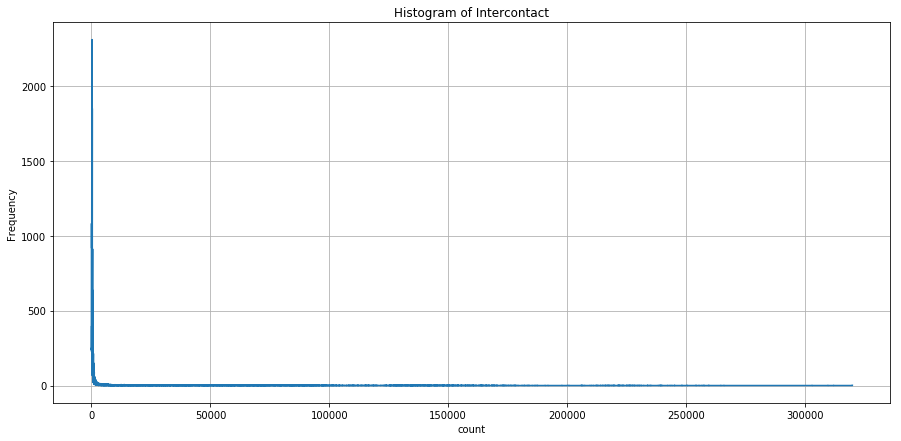

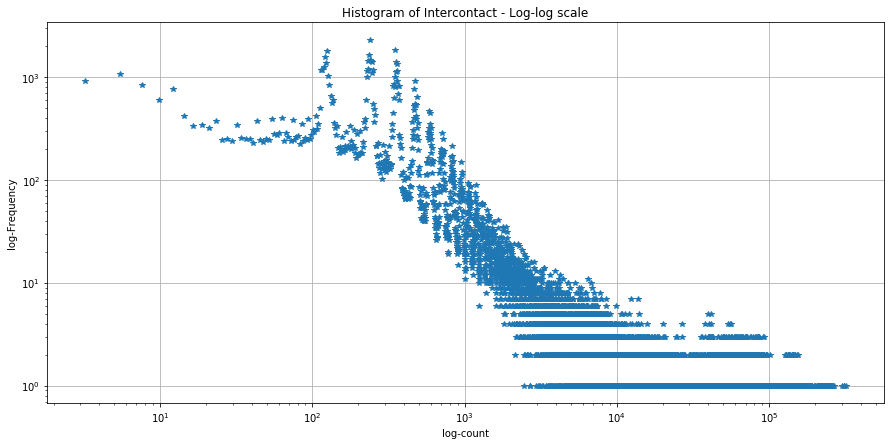

In [9]:
# Exercice 5

Hist_IC = np.histogram(inter_contact_IC[:,2], bins = len(inter_contact_IC[:,2]))
plt.figure(figsize=(15,7))
plt.plot(Hist_IC[1][1:],Hist_IC[0])
plt.xlabel('count')
plt.ylabel('Frequency')
plt.title('Histogram of Intercontact')
plt.grid(True)


Hist_IC = np.histogram(inter_contact_IC[:,2], bins = len(inter_contact_IC[:,2]))
plt.figure(figsize=(15,7))
plt.loglog(Hist_IC[1][1:],Hist_IC[0],'*')
plt.xlabel('log-count')
plt.ylabel('log-Frequency')
plt.title('Histogram of Intercontact - Log-log scale')
plt.grid(True)


In [10]:
# Exercice 6

def avg_degree(data,Nb_nodes,t):
    dim = np.shape(data[(data[:,2] <= t) & (data[:,3] >= t)])[0]
    return (dim/Nb_nodes)

####### (Try another funtion with for inside...)

all_times = A_IC[:,0].astype(int)
time_points = np.arange(np.min(all_times),np.max(all_times))

#t = time.time()
Avg_degree_IC = [avg_degree(IC_norm,nb_Nodes,t) for t in time_points]
#print(time.time() - t)

NameError: name 'nb_Nodes' is not defined

In [ ]:
# Exercise 7 
plt.figure(figsize=(15,7))
plt.plot(Avg_degree_IC)
plt.xlabel('')
plt.ylabel('')
plt.title('Avergae degree plot')
plt.grid(True)

In [ ]:
#Exercise 8

def Create_Delete_Fraction(data,Nb_nodes):
    # Data same as A_IC - ordrered by time 
    #return created and deleted fraction at each time step

    ###### Part 1 : 
    
    # create_delete a matrix containing 
    #  (time t , nb of created links, nb of deleted links, nb of existed links at previous time)
    
    all_times = data[:,0].astype(int)
    time_size = np.max(all_times) - np.min(all_times)
    
    n = data.shape[0] # number of creations/deletions

    create_delete = np.zeros([time_size, 4])
    
    # Time column
    create_delete[:,0] = np.arange(time_size)

    # Get usedfull data 
    # Type of link : C or S
    
    type_link = data[:,3].astype(str)
    
    t = 0 # indice on times will represent the actual time of observation
    
    for t in range(time_size):

        data_t = data[data[:,0].astype(int)==t]
        
        create_delete[t,1] += data_t[data_t[:,3].astype(str)=='C' ].shape[0]
        create_delete[t,2] += data_t[data_t[:,3].astype(str)=='S' ].shape[0]
        print(t)
    
    '''
    for obs in range(n): # for each creation/deletion
        
        while (all_times[obs] > t):  # if the corresponding time (of creation or deletion) is bigger than the actual time (t), then we move to the next time
            t = t + 1
        if(t==time_size): # we stop at the end
            break
            
        if((all_times[obs] == t)): # if the corresponding time (of the creation or deletion) corresponds to the actual time t then
            if(type_link[obs] == 'C'):
                create_delete[t,1] = create_delete[t,1] + 1 # Augment created
            elif(type_link[obs] == 'S'):
                create_delete[t,2] = create_delete[t,2] + 1 # augment deleted
    '''  
    
    # complete 4th column -  nb of existed links at previous time
    for t in np.arange(1,time_size):
        create_delete[t,3] = create_delete[t-1,3] + create_delete[t-1,1] - create_delete[t-1,2];

    ######### part2 :  Processing
    
    Fractions_create_delete = np.zeros([time_size, 3]) # contains : time, fractions created, fractions deleted
    
    total_links = Nb_nodes*(Nb_nodes-1)/2
    
    # by definition (given in Q8 - project)
    Fractions_create_delete[:,0] = create_delete[:,0] # Time column
    Fractions_create_delete[:,1] = create_delete[:,1]/(total_links- create_delete[:,3])
    Fractions_create_delete[:,2] = create_delete[:,2]/(create_delete[:,3])
    
    # Replace nan by -1 (creation impossible)
    Fractions_create_delete[np.isnan(Fractions_create_delete)] = -1
    
        
    return Fractions_create_delete

In [ ]:
Fractions_create_delete = Create_Delete_Fraction(A_IC,nb_Nodes_IC)

#Save into txt
# TO DO

### Show p - evolution of creation

plt.figure(figsize=(15,7))
plt.plot(Fractions_create_delete[:,1])
plt.xlabel('')
plt.ylabel('')
plt.title('Evolution of creation fraction')
plt.grid(True)



In [ ]:
Fractions_create_delete[:,1]

In [243]:
#### Calculate average p and d (we will ommit -1)

p = Fractions_create_delete[:,1]
d = Fractions_create_delete[:,2]

Avg_p = p[p >= 0].mean()
Avg_d = d[d >= 0].mean()

In [109]:
#Exercice 9:

########### Modeing and analysis


# A function that creat a new graph from the old one - one time step

# A graph is represented by all its edges (i,j) => une matrice Mx2 (M number of edges)


def edges(Nb_nodes):
    # a function that returns a list of possible edges formed by Nb_nodes
    # it will return a matrix containing (i,j) sc (i < j) (start from 0)
    c = []
    for i in range(Nb_nodes):
        for j in np.arange(i+1,Nb_nodes):
            c.append([i,j])
            
    return np.array(c)
        
        

def Next_graph(graph, p , d,Nb_nodes):
    # a given graph
    # probability p of creation
    # probability q of deletion
    # returns a new graph 
    # for all edges, if it exists in graph, then delete with probability d
    # if it does not exists in graph then creat with probability p 
    
    # Check what edges exist or not
    
    edges_ = edges(Nb_nodes) 
    a1_rows = edges_.view([('', edges_.dtype)] * edges_.shape[1])
    a2_rows = graph.view([('', edges_.dtype)] * edges_.shape[1])
    
    edges_not_existed_before = np.setdiff1d(a1_rows, a2_rows).view(edges_.dtype).reshape(-1, edges_.shape[1])
    #edges_not_existed_before = np.setdiff1d(edges_, graph).view(a.dtype).reshape(-1, a.shape[1])

    
    # With probability p, choose to creat one from indice_not_existed_edges
    # With probability d choose to delete one in graph
    
    indice_create = np.where(np.random.uniform(0,1,edges_not_existed_before.shape[0]) < p)[0]
    indice_delete = np.where(np.random.uniform(0,1,graph.shape[0]) < d)[0]
    
    # Edges to be created and adges to be deleted
    
    
    edges_create = edges_not_existed_before[indice_create]
    edges_delete = graph[indice_delete]
    
    #print(edges_create.shape)
    # New graph
    
    New_graph = np.delete(graph,indice_delete,0)
    New_graph = np.concatenate((New_graph,edges_create),axis = 0)
    
    
    # New instance : 
    
    # Created/ deleted ; there is no time here, we will add it in the external loop later
    
    C = np.column_stack((edges_create,np.repeat('C',edges_create.shape[0])))
    S = np.column_stack((edges_delete,np.repeat('S',edges_delete.shape[0])))

    Instance = np.vstack((C,S))
    
    return New_graph, Instance

In [110]:
edges_ = edges(20) 
graph = edges(10)
a1_rows = edges_.view([('', edges_.dtype)] * edges_.shape[1])
a2_rows = graph.view([('', graph.dtype)] * graph.shape[1])
    
edges_not_existed_before = np.setdiff1d(a1_rows, a2_rows).view(graph.dtype).reshape(-1, graph.shape[1])
    

In [113]:
# Simulation of graph evolution - Exercice 9

# Start with an empty graph

graph = np.empty([0, 2])
T = 10000
In_list = np.empty([0,4])
p = 0.1 #Avg_p
d = 0.1 #Avg_d to replace
Nb_nodes = 20


for t in range(T):
    #print(t)
    graph, In = Next_graph(graph, p  , d ,Nb_nodes)
    In = np.column_stack((np.repeat(t,In.shape[0]),In))
    In_list = np.vstack((In_list,In))


KeyboardInterrupt: 

In [112]:
In_list.shape

(297, 4)

In [70]:
data = In_list


C = data[data[:,3] == 'C']
S = data[data[:,3] == 'S']

b = C[C[:,1]=='0']
b[b[:,2]=='2']

array([['29', '0', '2', 'C'],
       ['31', '0', '2', 'C'],
       ['34', '0', '2', 'C'],
       ['40', '0', '2', 'C'],
       ['42', '0', '2', 'C'],
       ['61', '0', '2', 'C'],
       ['81', '0', '2', 'C'],
       ['113', '0', '2', 'C'],
       ['120', '0', '2', 'C'],
       ['124', '0', '2', 'C'],
       ['126', '0', '2', 'C'],
       ['132', '0', '2', 'C'],
       ['143', '0', '2', 'C'],
       ['147', '0', '2', 'C'],
       ['151', '0', '2', 'C'],
       ['155', '0', '2', 'C'],
       ['181', '0', '2', 'C'],
       ['193', '0', '2', 'C'],
       ['212', '0', '2', 'C'],
       ['216', '0', '2', 'C'],
       ['231', '0', '2', 'C'],
       ['234', '0', '2', 'C'],
       ['244', '0', '2', 'C'],
       ['246', '0', '2', 'C'],
       ['261', '0', '2', 'C'],
       ['262', '0', '2', 'C'],
       ['264', '0', '2', 'C'],
       ['271', '0', '2', 'C'],
       ['276', '0', '2', 'C'],
       ['286', '0', '2', 'C'],
       ['293', '0', '2', 'C'],
       ['316', '0', '2', 'C'],
       ['318', 

In [69]:
a = S[S[:,1]=='0.0']
a[a[:,2] == '2.0']

array([['33', '0.0', '2.0', 'S'],
       ['34', '0.0', '2.0', 'S'],
       ['42', '0.0', '2.0', 'S'],
       ['46', '0.0', '2.0', 'S'],
       ['56', '0.0', '2.0', 'S'],
       ['80', '0.0', '2.0', 'S'],
       ['83', '0.0', '2.0', 'S'],
       ['122', '0.0', '2.0', 'S'],
       ['123', '0.0', '2.0', 'S'],
       ['137', '0.0', '2.0', 'S'],
       ['137', '0.0', '2.0', 'S'],
       ['142', '0.0', '2.0', 'S'],
       ['147', '0.0', '2.0', 'S'],
       ['153', '0.0', '2.0', 'S'],
       ['181', '0.0', '2.0', 'S'],
       ['200', '0.0', '2.0', 'S'],
       ['206', '0.0', '2.0', 'S'],
       ['207', '0.0', '2.0', 'S'],
       ['217', '0.0', '2.0', 'S'],
       ['236', '0.0', '2.0', 'S'],
       ['240', '0.0', '2.0', 'S'],
       ['252', '0.0', '2.0', 'S'],
       ['261', '0.0', '2.0', 'S'],
       ['263', '0.0', '2.0', 'S'],
       ['272', '0.0', '2.0', 'S'],
       ['272', '0.0', '2.0', 'S'],
       ['277', '0.0', '2.0', 'S'],
       ['280', '0.0', '2.0', 'S'],
       ['285', '0.0', '2.0'

In [71]:
S

array([['1', '2.0', '10.0', 'S'],
       ['1', '4.0', '17.0', 'S'],
       ['2', '9.0', '14.0', 'S'],
       ...,
       ['999', '2.0', '13.0', 'S'],
       ['999', '8.0', '9.0', 'S'],
       ['999', '4.0', '8.0', 'S']], dtype='<U32')

In [733]:
#Exercice 10

# After obtaining Instance_list, we need to recover the other format (IC_norm) in order to compute Avg_degree

def format_converting(data,Nb_nodes):
    
    # Get C's
    C = data[data[:,3] == 'C']
    S = data[data[:,3] == 'S']
    
    Node1 = C[:,1].astype(float)
    Node2 = C[:,2].astype(float)
    Time = C[:,1].astype(float)
    
    for i in range(C.shape[0]):
        
    

array([['0', '13', '17', 'C'],
       ['375', '3', '14', 'C'],
       ['463', '16', '53', 'C'],
       ...,
       ['337062', '5', '29', 'S'],
       ['337418', '5', '29', 'C'],
       ['337419', '5', '29', 'S']], dtype='<U21')

In [806]:
data = In_list
C = data[data[:,3] == 'C']
S = data[data[:,3] == 'S']
C[:,1] = C[:,1].astype(float)

In [36]:
In_list

NameError: name 'In_list' is not defined